# Load and plot up a pre-computed KdV solution

In [1]:
import xray
from kdvlamb import KdV, from_netcdf
from soda.utils.otherplot import axcolorbar

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

# Set font sizes
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/suntans/.config/matplotlib/matplotlibrc", line #35
  (fname, cnt))


In [9]:
# Winter case (wave of elevation)
#kdvfile_w = '../KDVOUTPUT/KdV_BrowseBasin_20080609_dx020_a0050_Lw030644_mode1_nuH01.nc'
#xlims_w = [3.5e4,5.5e4]



clims = [-1.0,1.0]
H = 250.

# Summer case (wave of elevation)
#kdvfile = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080121_dx025_dt04a0075_Lw040000_mode1_nuH01.nc'
kdvfile = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080121_dx025_dt04a0040_Lw020000_mode1_nuH01.nc'
xlims = [9e4,11e4]

# Winter case (wave of elevation)
kdvfile_w = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080818_dx025_dt04a0040_Lw020000_mode1_nuH01.nc'
xlims_w = [7.0e4,9.0e4]

#kdvfile_w = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080818_dx025_dt04a0040_Lw020000_mode1_nuH01.nc'
#xlims_w = [5e4,7e4]

kdvfile_a = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080414_dx025_dt04a0040_Lw020000_mode1_nuH01.nc'
#xlims_w = [3.5e4,5.5e4]
xlims_a = [8e4,10e4]

#kdvfile_w = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080414_dx025_dt04a0075_Lw040000_mode1_nuH00.nc'
#xlims_w = [3.5e4,5.5e4]



outpath = '../FIGURESKDV'

#kdvx = xray.open_dataset(kdvfile)
#kdvx

mykdv = from_netcdf(kdvfile)
mykdv.print_params()

mykdv_a = from_netcdf(kdvfile_a)
mykdv_a.print_params()

mykdv_w = from_netcdf(kdvfile_w)
mykdv_w.print_params()

Parameters:
 c1 = 1.230222
 epsilon = 1.000000
 mu = 1.000000
 r01 = -3869.349534
 r10 = 0.001230
 r20 = 0.0000101

Parameters:
 c1 = 1.268541
 epsilon = 1.000000
 mu = 1.000000
 r01 = -4010.219605
 r10 = -0.000248
 r20 = 0.0000124

Parameters:
 c1 = 1.276165
 epsilon = 1.000000
 mu = 1.000000
 r01 = -3860.005423
 r10 = -0.002307
 r20 = 0.0000327



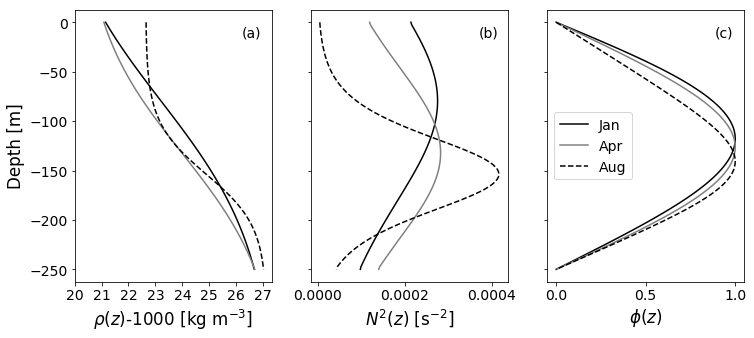

In [8]:
# Plot the density profile
plt.figure(figsize=(12,5))

# Density/N2 plot
ax=plt.subplot(131)
plt.plot( mykdv.rhoz-1e3, mykdv.z ,'0.0')
plt.plot( mykdv_a.rhoz-1e3, mykdv_a.z ,'-',color='0.5')
plt.plot( mykdv_w.rhoz-1e3, mykdv_w.z ,'--',color='0.0')
plt.xlabel(r'$\rho(z)$-1000 [kg m$^{-3}$]')
ax.set_xticks(range(20,28))
ax.text(0.85,0.9, '(a)', transform=ax.transAxes)
plt.ylabel('Depth [m]')

ax=plt.subplot(132)
ax.plot(mykdv.N2 , mykdv.z,'k')
plt.plot( mykdv_a.N2, mykdv_a.z ,'-',color='0.5')
ax.plot(mykdv_w.N2 , mykdv_w.z,'--', color='k')
plt.xlabel('$N^2(z)$ [s$^{-2}$]')
ax.set_xticks([0,2e-4,4e-4])
ax.set_yticklabels([])
ax.text(0.85,0.9, '(b)', transform=ax.transAxes)


# linear eigen function
dphi = np.gradient(mykdv.phi_1, -mykdv.dz_s)
dphi_a = np.gradient(mykdv_a.phi_1, -mykdv_a.dz_s)
dphi_w = np.gradient(mykdv_w.phi_1, -mykdv_w.dz_s)

ax=plt.subplot(133)
plt.plot( mykdv.phi_1, mykdv.z,'k')
plt.plot( mykdv_a.phi_1, mykdv_a.z ,'-',color='0.5')
plt.plot( mykdv_w.phi_1, mykdv_w.z,'k--')
plt.xlabel(r'$\phi(z)$')
ax.set_yticklabels([])
ax.text(0.85,0.9, '(c)', transform=ax.transAxes)

#ax2=ax.twiny()
#ax2.plot(dphi , mykdv.z,'k')
#ax2.plot([0,0],[-H,0],'k--')
#plt.xlabel('$ d \phi_1 / dz$')
plt.legend(('Jan','Apr','Aug'), loc='best')
plt.savefig('%s/density_profiles.png'%outpath,dpi=150)
plt.savefig('%s/density_profiles.pdf'%outpath)

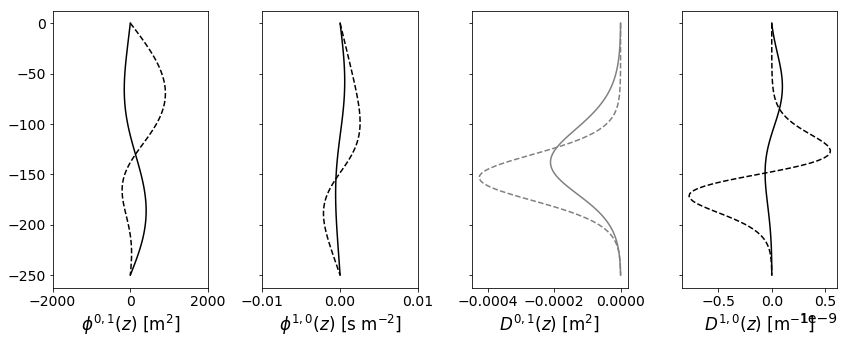

In [4]:
# Plot the higher-order function
plt.figure(figsize=(12,5))
ax=plt.subplot(141)
plt.plot( mykdv.phi01, mykdv.z,'k')
plt.plot( mykdv_w.phi01, mykdv_w.z,'k--')

#plt.plot( mykdv.D01, mykdv.z,'0.5')
#plt.plot( mykdv_w.D01, mykdv_w.z,'--', color='0.5')
plt.xlabel(r'$\phi^{0,1}(z)$ [m$^{2}$]')
plt.xlim(-2000,2000)
ax.set_xticks([-2000.,0,2000])
#ax.set_yticklabels([])

ax=plt.subplot(142)
plt.plot( mykdv.phi10, mykdv.z,'k')
plt.plot( mykdv_w.phi10, mykdv_w.z,'k--')
plt.xlabel(r'$\phi^{1,0}(z)$ [s m$^{-2}$]')
#plt.xlim(-4000,4000)
ax.set_xticks([-1e-2,0,1e-2])
ax.set_yticklabels([])

ax=plt.subplot(143)

plt.plot( mykdv.D01*mykdv_w.N2, mykdv.z,'0.5')
plt.plot( mykdv_w.D01*mykdv_w.N2, mykdv_w.z,'--', color='0.5')
plt.xlabel(r'$D^{0,1}(z)$ [m$^{2}$]')
#plt.xlim(-2000,2000)
#ax.set_xticks([-2000.,0,2000])
ax.set_yticklabels([])

ax=plt.subplot(144)
plt.plot( mykdv.D10*mykdv.N2, mykdv.z,'k')
plt.plot( mykdv_w.D10*mykdv_w.N2, mykdv_w.z,'k--')

#plt.plot( mykdv.D10, mykdv.z,'0.5')
#plt.plot( mykdv_w.D10, mykdv_w.z,'--', color='0.5')
plt.xlabel(r'$D^{1,0}(z)$ [m$^{-1}$]')
#plt.xlim(-4000,4000)
#ax.set_xticks([-1e-2,0,1e-2])
ax.set_yticklabels([])
plt.tight_layout()

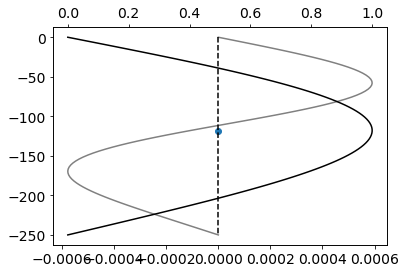

In [5]:
idx = np.argwhere(mykdv.phi_1 == 1.)[0][0]
ax=plt.subplot(111)
plt.plot( -mykdv.T10[:], mykdv.z,'0.5')
plt.plot( 0, mykdv.z[idx],'o')
plt.plot(mykdv.z*0,mykdv.z,'k--')
ax2=ax.twiny()
ax2.plot(mykdv.phi_1 , mykdv.z,'k')


In [6]:
### Find the locations of maxima
def find_min_max(data):
    # This returns indices of min-max
    a = np.diff(np.sign(np.diff(data))).nonzero()[0] + 1 # local min+max
    b = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (np.diff(np.sign(np.diff(data))) < 0).nonzero()[0] + 1 # local max

    # remove a threshold
    thresh = 1e-1
    a0 = a[np.abs(data[a])>thresh]
    b0 = b[np.abs(data[b])>thresh]
    c0 = c[np.abs(data[c])>thresh]
    
    return a0, b0, c0

def calc_A_Ls(mykdv):
    
    a0,b0,c0 = find_min_max(mykdv.B)
    # Calculate the amplitude and wavelength
    xmin = mykdv.x[b0] # minima x-locations
    amin = mykdv.B[b0] # minima amplitude

    xmax = mykdv.x[c0] # maxima x-locations
    amax = mykdv.B[c0] # maxima amplitude

    # Get the amplitude of the leading wave
    if mykdv.r10 <= 0.:# wave of elevation
        A = amax[-1]
        X = xmax
    else: # wave of depression
        A = amin[-1]
        X = xmin

    # Get the averaege wavelength of the "n" leading waves
    nleading = 3
    if X.shape[0] -1 < nleading:
        Ls = np.inf
    else:
        Ls = np.mean(np.diff(X)[-nleading:])

    print A, Ls, np.diff(X)[-nleading:]

def plot_wave(mykdv, xlims, depression=True, ylim=None):
    # Wave of depression
    a0,b0,c0 = find_min_max(mykdv.B)


   
    plt.plot(mykdv.x, mykdv.B,'0.5')
    plt.plot(mykdv.x[b0], mykdv.B[b0],'d',color='0.5') # Min
    plt.plot(mykdv.x[c0], mykdv.B[c0],'o', color='0.2') # Max
    plt.xlim(xlims)
    #plt.grid(b=True)


    if depression==False:
        b0=c0
    
    oset = 3e3
    # Annotate the amplitude
    plt.plot([mykdv.x[b0[-1]]+oset,mykdv.x[b0[-1]]+oset], [mykdv.B[b0[-1]],0],'k')
    plt.plot([mykdv.x[b0[-1]]+oset-0.2e3,mykdv.x[b0[-1]]+oset+0.2e3], [mykdv.B[b0[-1]],mykdv.B[b0[-1]]],'k')
    plt.plot([mykdv.x[b0[-1]]+oset-0.2e3,mykdv.x[b0[-1]]+oset+0.2e3], [0,0],'k')
    plt.text(mykdv.x[b0[-1]]+oset+0.5e3, mykdv.B[b0[-1]]/2, '$A_{max}$')
    
    plt.plot(xlims, [0,0], 'k--')

    # Annotate the wavelength
    if depression:
        plt.plot([mykdv.x[b0[-2]],mykdv.x[b0[-1]]], [mykdv.B[b0[-1]]-20,mykdv.B[b0[-1]]-20],'k')
        plt.plot([mykdv.x[b0[-2]],mykdv.x[b0[-2]]], [mykdv.B[b0[-1]]-15,mykdv.B[b0[-1]]-25],'k')
        plt.plot([mykdv.x[b0[-1]],mykdv.x[b0[-1]]], [mykdv.B[b0[-1]]-15,mykdv.B[b0[-1]]-25],'k')
        plt.text(0.5*(mykdv.x[b0[-1]]+mykdv.x[b0[-2]])-1e2, mykdv.B[b0[-1]]-10,'$\lambda_s$')
    else:
        plt.plot([mykdv.x[b0[-2]],mykdv.x[b0[-1]]], [mykdv.B[b0[-1]]+20,mykdv.B[b0[-1]]+20],'k')
        plt.plot([mykdv.x[b0[-2]],mykdv.x[b0[-2]]], [mykdv.B[b0[-1]]+15,mykdv.B[b0[-1]]+25],'k')
        plt.plot([mykdv.x[b0[-1]],mykdv.x[b0[-1]]], [mykdv.B[b0[-1]]+15,mykdv.B[b0[-1]]+25],'k')
        plt.text(0.5*(mykdv.x[b0[-1]]+mykdv.x[b0[-2]])-1e2, mykdv.B[b0[-1]]+25,'$\lambda_s$')


    plt.ylim(ylim)

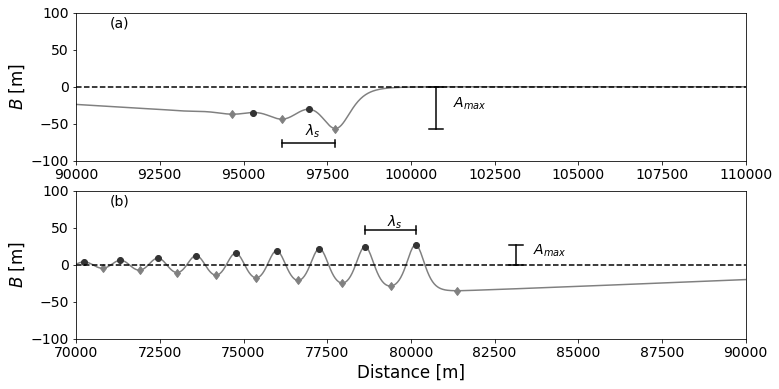

In [10]:
plt.figure(figsize=(12,6))
ax=plt.subplot(211)
plot_wave(mykdv, xlims, depression=True, ylim=[-100,100])
plt.ylabel('$B$ [m]')
ax.text(0.05,0.9, '(a)', transform=ax.transAxes)

ax=plt.subplot(212)
plot_wave(mykdv_w, xlims_w, depression=False, ylim=[-100,100])
plt.ylabel('$B$ [m]')
plt.xlabel('Distance [m]')
ax.text(0.05,0.9, '(b)', transform=ax.transAxes)

plt.savefig('%s/Example_A_Ls.png'%outpath,dpi=150)
plt.savefig('%s/Example_A_Ls.pdf'%outpath)

# Plot the initial and final conditions


In [11]:
def plot_ic_B(mykdv, xlims):
    mykdv_i = KdV(mykdv.rhoz, mykdv.z,\
                 L_d=mykdv.L_d, Nx=mykdv.Nx,\
                 #a0=mykdv.a0,
                 x0=mykdv.x0,\
                 a0=40.,\
                 Lw=mykdv.Lw,\
                 nondim=False)

    # Calculate the velocity and density fields
    rho = mykdv.calc_density(nonlinear=True)
    u,w = mykdv.calc_velocity(nonlinear=True)

    # Calculate the velocity and density fields
    rho_i = mykdv_i.calc_density(nonlinear=True, method='l96')
    rho_i2 = mykdv_i.calc_density(nonlinear=False)
    u_i,w = mykdv_i.calc_velocity(nonlinear=True)

    plt.figure(figsize=(9,12))
    ax = plt.subplot2grid((6,1),(0,0))
    plt.plot(mykdv_i.x, mykdv_i.B ,'0.5')
    plt.xlim(0,12e4)
    ax.set_xticklabels([])
    plt.ylim(-100, 100)
    plt.ylabel('$B$ [m]')
    ax.text(0.05,0.9, '(a)', transform=ax.transAxes)


    ax = plt.subplot2grid((6,1),(1,0), rowspan=2)
    plt.pcolormesh(mykdv_i.x, mykdv_i.z, u_i.T, 
        #cmap='RdBu_r',\
        vmin=clims[0], vmax=clims[1], cmap='RdBu_r')
    #cb=plt.colorbar(orientation='horizontal')
    #cb.ax.set_title('u [m/s]')
    plt.contour(mykdv_i.x, mykdv_i.z, rho_i.T, np.arange(20.,30.,0.25),\
            colors='k', linewidths=0.5)
    #plt.contour(mykdv_i.x, mykdv_i.z, rho_i2.T, np.arange(20.,30.,0.25),\
    #        colors='0.5', linewidths=0.5)
    plt.xlim(0,12e4)
    ax.set_xticklabels([])
    plt.ylabel('Depth[m]')
    ax.text(0.05,0.9, '(b)', transform=ax.transAxes)


    ax = plt.subplot2grid((6,1),(3,0))
    plt.plot(mykdv.x, mykdv.B ,'0.5')
    plt.xlim(0,12e4)
    #ax.set_xticklabels([])
    plt.ylim(-100,100)
    plt.ylabel('$B$ [m]')
    ax.text(0.05,0.9, '(c)', transform=ax.transAxes)
    
    plt.plot([xlims[0], xlims[1],xlims[1],xlims[0],xlims[0]],
            [-100,-100,100,100,-100],'k--', lw=2)

    ax = plt.subplot2grid((6,1),(4,0), rowspan=2)
    p1= plt.pcolormesh(mykdv.x, mykdv.z, u.T, 
        #cmap='RdBu_r',\
        vmin=clims[0], vmax=clims[1], cmap='RdBu_r')
    #cb=plt.colorbar(orientation='horizontal')
    #cb.ax.set_title('u [m/s]')
    plt.contour(mykdv.x, mykdv.z, rho.T, np.arange(20.,30.,0.25),\
            colors='k', linewidths=0.5)

    plt.xlim(0,12e4)

    plt.xlabel('Distance [m]')
    plt.ylabel('Depth[m]')
    ax.text(0.05,0.9, '(d)', transform=ax.transAxes)

    plt.xlim(xlims)
    
    cb = axcolorbar(p1, ax=ax)
    cb.set_ticks([clims[0],0, clims[1]])
    cb.ax.set_title('u [m/s]')
    
    #plt.tight_layout()

    return rho_i

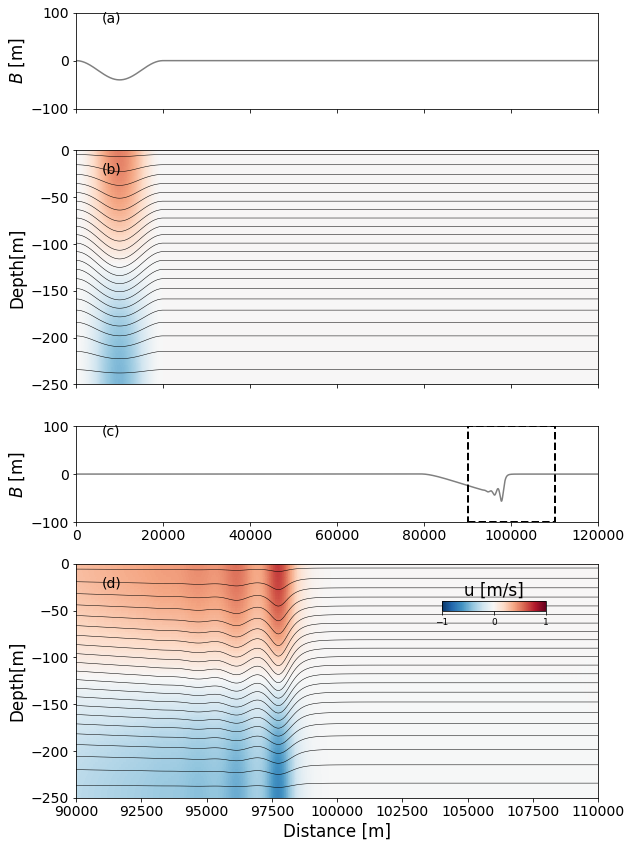

In [12]:
rhoi = plot_ic_B(mykdv, xlims)
plt.savefig('%s/Example_KdV_Solution_summer.png'%outpath,dpi=150)

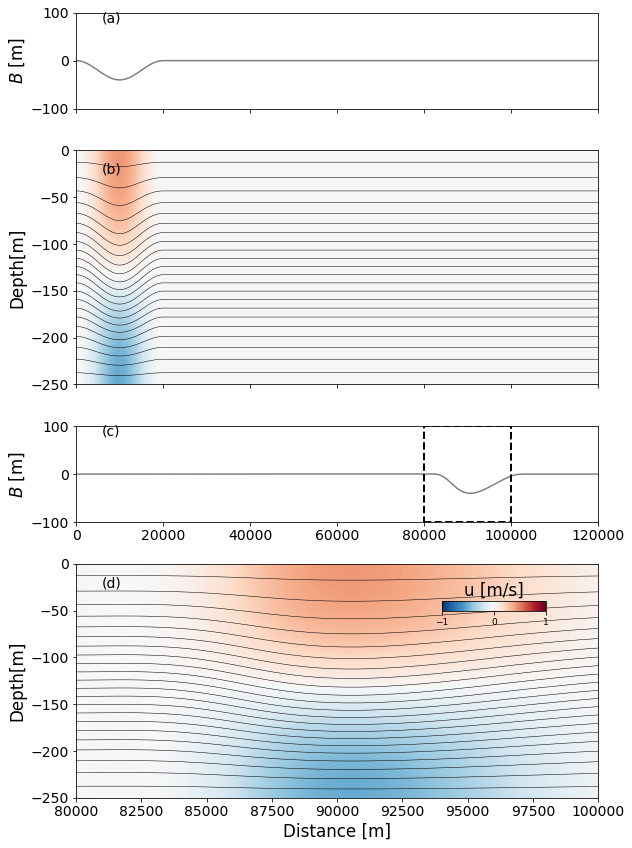

In [13]:
plot_ic_B(mykdv_a, xlims_a)
plt.savefig('%s/Example_KdV_Solution_autmun.png'%outpath,dpi=150)


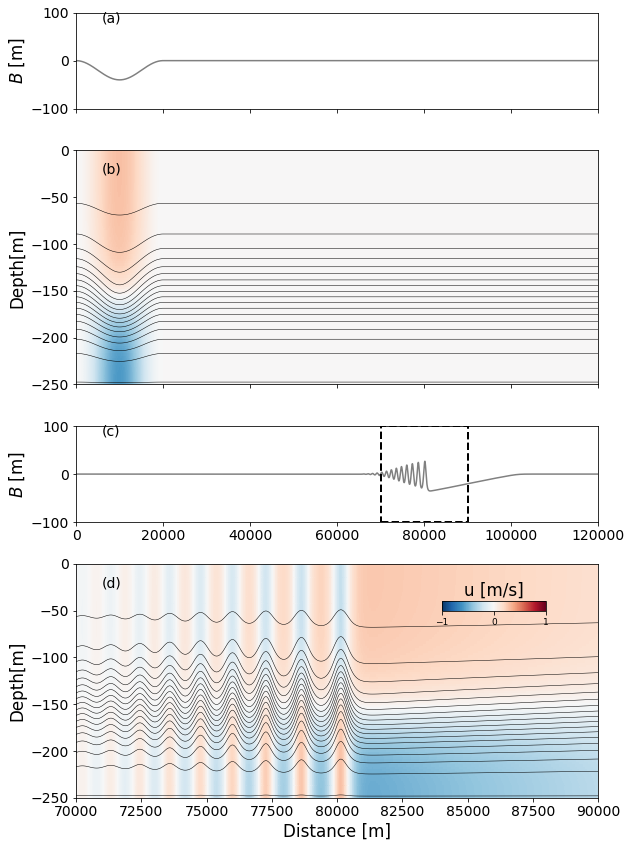

In [14]:
plot_ic_B(mykdv_w, xlims_w)
plt.savefig('%s/Example_KdV_Solution_winter.png'%outpath,dpi=150)

# Other stuff...

In [59]:
# Calculate the velocity and density fields
rho = mykdv.calc_density(nonlinear=True)
u,w = mykdv.calc_velocity(nonlinear=True)

print np.abs(u).max()

0.839326799052


In [60]:
# Calculate the shear/strain
ux, uz = np.gradient(u)
wx, wz = np.gradient(w)
uz /= mykdv.dz_s
ux /= mykdv.dx_s

wz /= mykdv.dz_s
wx /= mykdv.dx_s


In [61]:
# Calculate the max buoyancy
Nmax = np.sqrt(np.max(mykdv.N2))
Nmax

0.013435598586165449

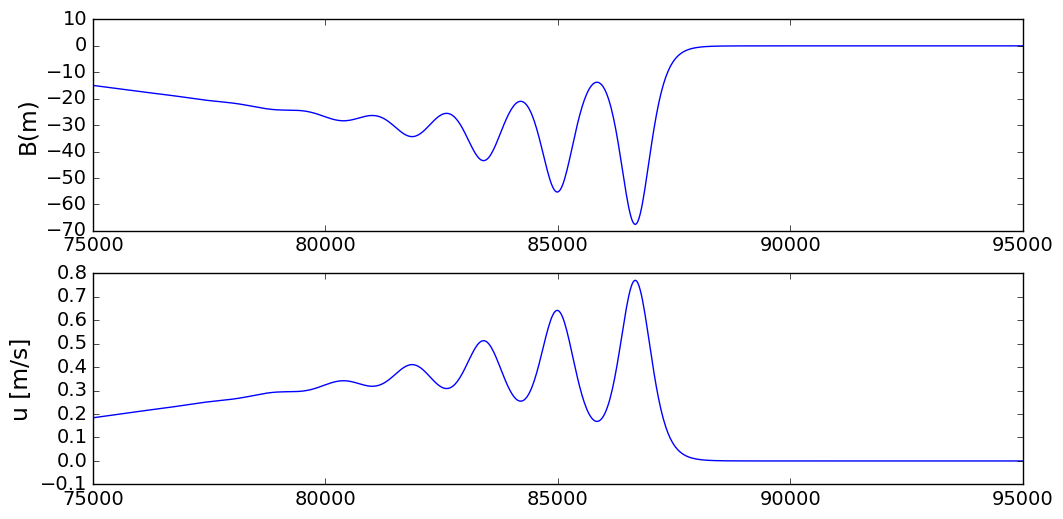

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(mykdv.x, mykdv.B)
plt.xlim(xlims)
plt.ylabel('B(m)')

plt.subplot(212)
plt.plot(mykdv.x, u[:,0])
plt.xlim(xlims)
plt.ylabel('u [m/s]')



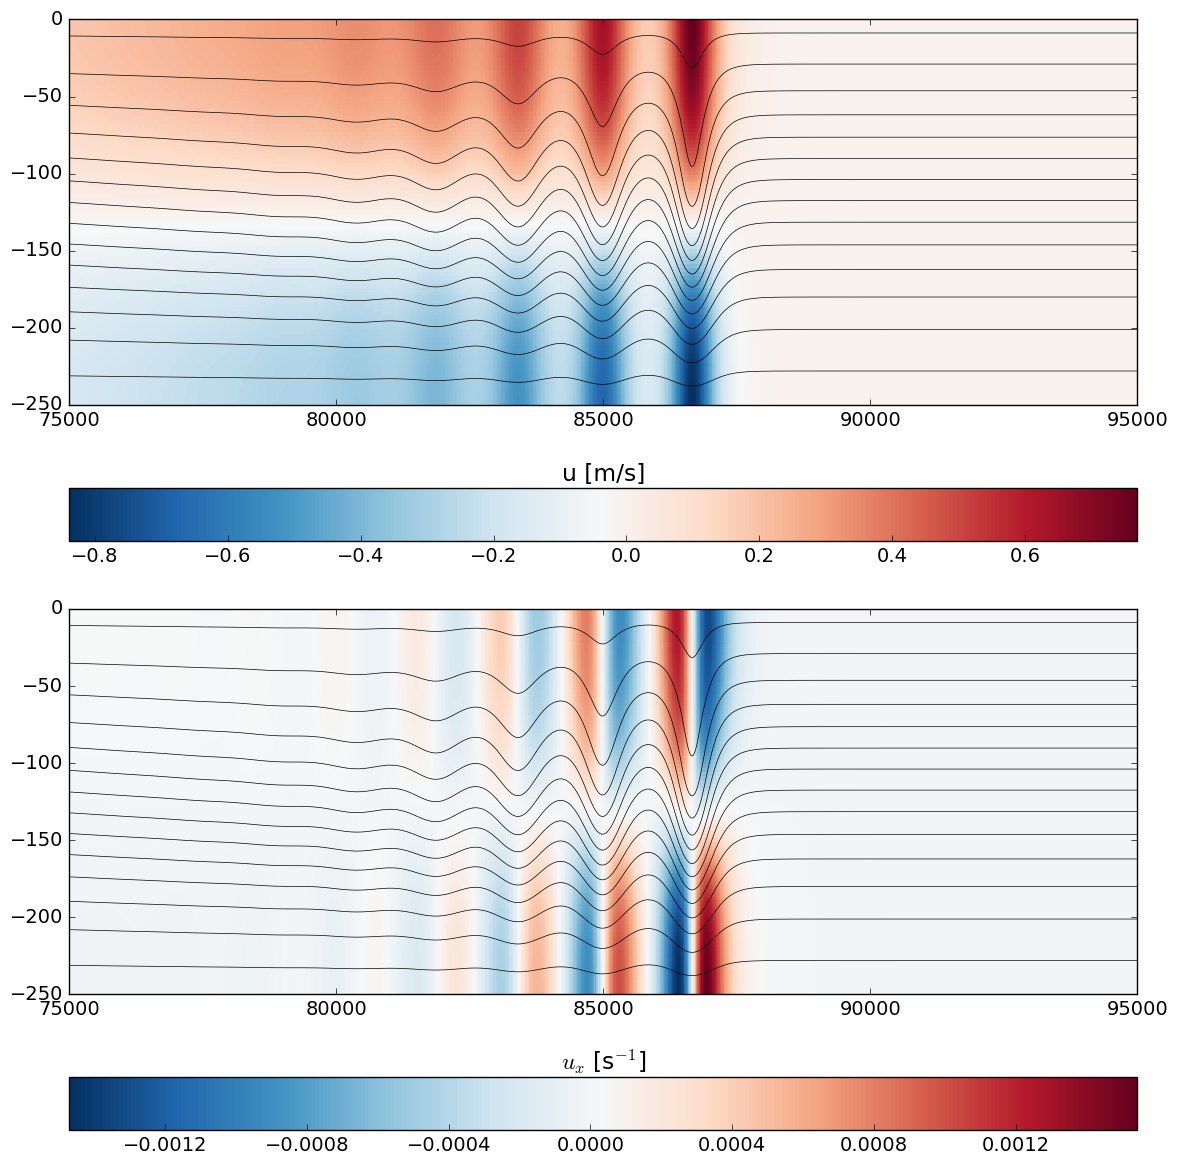

In [63]:
### Plot the density
clims = [-0.75,0.75]

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.pcolormesh(mykdv.x, mykdv.z, u.T, 
    cmap='RdBu_r')
    #vmin=clims[0], vmax=clims[1], cmap='RdBu_r')
cb=plt.colorbar(orientation='horizontal')
cb.ax.set_title('u [m/s]')
plt.contour(mykdv.x, mykdv.z, rho.T, np.arange(20.,30.,0.25),\
        colors='k', linewidths=0.5)
plt.xlim(xlims)

#plt.xlim(-0.8e4, 0.8e4)
#plt.xlim(-1.1e4, 0.7e4)

plt.subplot(212)
plt.pcolormesh(mykdv.x, mykdv.z, ux.T, 
     cmap='RdBu_r')
cb=plt.colorbar(orientation='horizontal')
#cb.ax.set_title('w [m/s]')
cb.ax.set_title('$u_x$ [s$^{-1}$]')
plt.contour(mykdv.x, mykdv.z, rho.T, np.arange(0.,30.,0.25),\
        colors='k', linewidths=0.5)

plt.xlim(xlims)
#plt.xlim(-1.1e4, 0.7e4)

plt.tight_layout()
